In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from common import Images, Fonts
from matplotlib.patches import Rectangle, Ellipse

In [2]:
df = pd.read_csv("goals.csv")
df

,date,half,min,sec,x,y,player,team
0,2022-04-29,1,2,18,96.6,48.7,Vanessa Gilles,LA
1,2022-04-29,1,12,39,90.2,64.9,Jun Endo,LA
2,2022-04-29,2,50,17,94.0,52.4,Debinha,NC
3,2022-04-30,1,7,14,94.8,45.5,Morgan Weaver,POR
4,2022-04-30,1,33,36,95.9,54.0,Christine Sinclair,POR
...,...,...,...,...,...,...,...,...
375,2022-10-23,2,92,40,83.3,63.3,Crystal Dunn,POR
376,2022-10-23,1,3,21,92.9,42.1,Alexis Loera,KC
377,2022-10-23,2,62,10,82.8,49.8,Kristen Hamilton,KC
378,2022-10-29,1,3,59,97.8,57.1,Sophia Smith,POR


In [3]:
field = "white"
lines = "black"

<Figure size 720x576 with 0 Axes>

<Figure size 12000x9600 with 0 Axes>

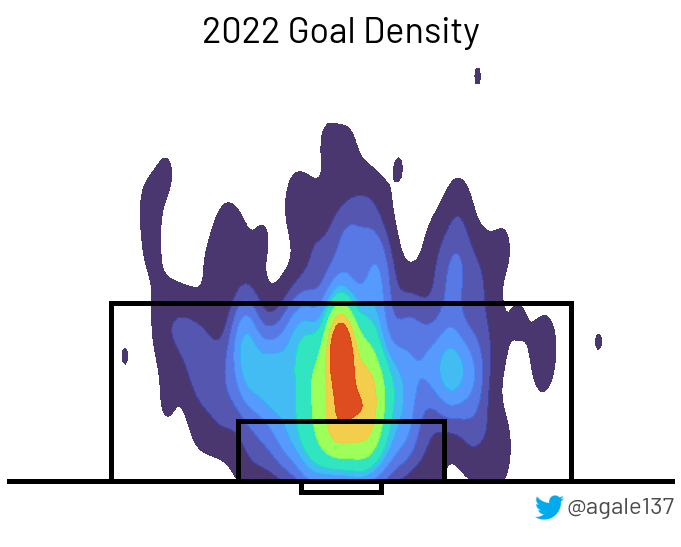

In [89]:
# Set up plot
plt.clf()
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=1200, facecolor=field)
fig, ax = plt.subplots()
fig.tight_layout()

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([])
ax.set_yticks([])
plt.ylim([60, 105])
plt.xlim([8, 92])
ax.invert_yaxis()

# Build the field
# Touchline
ax.add_patch(Rectangle((0, 0), 100, 100, ec=lines, fc=field, lw=5))

# Heatmap
hm = sns.kdeplot(
    x=df["y"], y=df["x"], cmap="turbo", shade=True, levels=10, bw_adjust=0.4, alpha=0.9
)

# Cover the heatmap off the field
ax.add_patch(Rectangle((0, 100), 100, 10, ec=None, fc=field))

# Center circle
# ax.add_patch(Ellipse((50, 50), 16, 26, ec=lines, fill=False, lw=5))
# Centerline
ax.add_patch(Rectangle((0, 50), 100, 50, ec=lines, fill=False, lw=5))
# 18-yard box
ax.add_patch(Rectangle((21, 100 - 15), 58, 15, ec=lines, fill=False, lw=5))
# 6-yard box
ax.add_patch(Rectangle((37, 100 - 5), 26, 5, ec=lines, fill=False, lw=5))
# Goal
ax.add_patch(Rectangle((45, 100), 10, 1, ec=lines, fill=False, lw=5))

# Title
plt.text(
    50, 63, "2022 Goal Density", fontsize=36, fontproperties=Fonts.BARLOW, ha="center"
)

# Twitter logo and username
plt.text(
    1,
    0.06,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=24,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.77, 0.08, 0.05, 0.05], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Save image
plt.savefig("goal_density.png", bbox_inches="tight", transparent=False, pad_inches=0.5)